In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import re
import datetime
import pylab as pl
pl.style.use('fivethirtyeight')
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import statsmodels.api as sma
import numpy as np
import scipy
import statsmodels

In [3]:
def convertDate(d):
    #dt = datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S')
    #dt = dt.replace(minute=(dt.minute / 20) * 10, second=0, microsecond=0)
    dt = datetime.datetime.strptime(d, '%m/%d/%Y')
    dt = dt.replace(day=1)
    #dt = dt - datetime.timedelta(hours=5)
    return dt

crashes = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv', converters={'DATE': convertDate})#, parse_dates=[1])

In [4]:
crashes['PERCENT OF PERSONS KILLED'] = crashes['NUMBER OF PERSONS KILLED']/(crashes['NUMBER OF PERSONS KILLED'] + crashes['NUMBER OF PERSONS INJURED'])
crashes['PERCENT OF PEDESTRIANS KILLED'] = crashes['NUMBER OF PEDESTRIANS KILLED']/(crashes['NUMBER OF PEDESTRIANS KILLED'] + crashes['NUMBER OF PEDESTRIANS INJURED'])
crashes['PERCENT OF CYCLIST KILLED'] = crashes['NUMBER OF CYCLIST KILLED']/(crashes['NUMBER OF CYCLIST KILLED'] + crashes['NUMBER OF CYCLIST INJURED'])
crashes['PERCENT OF MOTORIST KILLED'] = crashes['NUMBER OF MOTORIST KILLED']/(crashes['NUMBER OF MOTORIST KILLED'] + crashes['NUMBER OF MOTORIST INJURED'])

In [5]:
crashes['month'] = crashes.apply(lambda x: x['DATE'].month, axis=1)
#crashes.iloc[0].DATE.month

In [5]:
crashes.columns

Index([u'DATE', u'TIME', u'BOROUGH', u'ZIP CODE', u'LATITUDE', u'LONGITUDE',
       u'LOCATION', u'ON STREET NAME', u'CROSS STREET NAME',
       u'OFF STREET NAME', u'NUMBER OF PERSONS INJURED',
       u'NUMBER OF PERSONS KILLED', u'NUMBER OF PEDESTRIANS INJURED',
       u'NUMBER OF PEDESTRIANS KILLED', u'NUMBER OF CYCLIST INJURED',
       u'NUMBER OF CYCLIST KILLED', u'NUMBER OF MOTORIST INJURED',
       u'NUMBER OF MOTORIST KILLED', u'CONTRIBUTING FACTOR VEHICLE 1',
       u'CONTRIBUTING FACTOR VEHICLE 2', u'CONTRIBUTING FACTOR VEHICLE 3',
       u'CONTRIBUTING FACTOR VEHICLE 4', u'CONTRIBUTING FACTOR VEHICLE 5',
       u'UNIQUE KEY', u'VEHICLE TYPE CODE 1', u'VEHICLE TYPE CODE 2',
       u'VEHICLE TYPE CODE 3', u'VEHICLE TYPE CODE 4', u'VEHICLE TYPE CODE 5',
       u'PERCENT OF PERSONS KILLED', u'PERCENT OF PEDESTRIANS KILLED',
       u'PERCENT OF CYCLIST KILLED', u'PERCENT OF MOTORIST KILLED'],
      dtype='object')

In [20]:
sum_categories = [
    'NUMBER OF PERSONS KILLED',
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF CYCLIST KILLED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF MOTORIST KILLED',
    'NUMBER OF MOTORIST INJURED'
]

injured_categories = [
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF MOTORIST INJURED'
]

injured_categories_2 = [
    ('NUMBER OF PERSONS INJURED', 'Person', 'blue', 0),
    ('NUMBER OF PEDESTRIANS INJURED', 'Pedestrian', 'green', 1),
    ('NUMBER OF CYCLIST INJURED', 'Cyclist', 'red', 2),
    ('NUMBER OF MOTORIST INJURED', 'Motorist', 'orange', 3)
]
        
percent_categories = [
    'PERCENT OF PERSONS KILLED',
    'PERCENT OF PEDESTRIANS KILLED',
    'PERCENT OF CYCLIST KILLED',
    'PERCENT OF MOTORIST KILLED',
]

In [149]:
crashes.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,UNIQUE KEY,PERCENT OF PERSONS KILLED,PERCENT OF PEDESTRIANS KILLED,PERCENT OF CYCLIST KILLED,PERCENT OF MOTORIST KILLED,month
count,538162.000000,596085.000000,596085.000000,708007.000000,708007.000000,708007.000000,708007.000000,708007.000000,708007.000000,708007.000000,708007.000000,708007.000000,132505.000000,36690.000000,14219.000000,82311.000000,708007.000000
mean,10800.934574,40.722732,-73.924408,0.254719,0.001288,0.053439,0.000696,0.020134,0.000073,0.181142,0.000518,1482278.655330,0.005606,0.012691,0.003587,0.003085,6.887025
std,568.887958,0.077049,0.086071,0.657698,0.037748,0.237783,0.026645,0.141401,0.008570,0.617241,0.025234,1438585.727933,0.072172,0.110833,0.059489,0.051994,3.316556
min,10000.000000,40.498949,-74.254532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,10065.000000,40.669124,-73.980203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,178389.500000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,11204.000000,40.723650,-73.935373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,356252.000000,0.000000,0.000000,0.000000,0.000000,7.000000
75%,11235.000000,40.765300,-73.871187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3167124.500000,0.000000,0.000000,0.000000,0.000000,10.000000
max,11697.000000,40.912828,-73.700597,43.000000,5.000000,15.000000,2.000000,4.000000,1.000000,43.000000,5.000000,3345024.000000,1.000000,1.000000,1.000000,1.000000,12.000000


In [138]:
def doStuff02(col,label,ax,color):
    print
    print col
    
    agg = crashes.groupby('DATE').sum()[col]
    months = crashes.groupby('DATE').mean()['month']
    
    x = np.unique(crashes['DATE'])
    
    #figure, ax = pl.subplots(figsize=(16,6))
    ax.plot_date(x, agg, '-',color=color, alpha=.5, label='Actual %s Injuries' % label)
    
    df = {'d': range(len(agg)), 'c': agg, 'm': months}
    mod = smf.ols(formula='c ~ d + C(m)', data = df).fit()
    print mod.summary()
    y = mod.predict(df)
    ax.plot_date(x, y, '--',color=color, label='%s Model' % label)
    


In [150]:
def doStuff03(col,label,ax,color):
    print
    print col
    
    agg = crashes.groupby('DATE').sum()[col]
    total = crashes.groupby('DATE').count()[col]
    div = agg/total
    months = crashes.groupby('DATE').mean()['month']
    
    x = np.unique(crashes['DATE'])
    
    #figure, ax = pl.subplots(figsize=(16,6))
    ax.plot_date(x, div, '-',color=color, alpha=.5, label='Actual %s Injuries' % label)
    
    df = {'d': range(len(div)), 'c': div, 'm': months}
    mod = smf.ols(formula='c ~ d + C(m)', data = df).fit()
    print mod.summary()
    y = mod.predict(df)
    ax.plot_date(x, y, '--',color=color, label='%s Model' % label)
    


                            OLS Regression Results                            
Dep. Variable:                      c   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     12.69
Date:                Sun, 06 Dec 2015   Prob (F-statistic):           2.52e-08
Time:                        16:19:33   Log-Likelihood:                -307.73
No. Observations:                  41   AIC:                             641.5
Df Residuals:                      28   BIC:                             663.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     1.535e+04    332.924     46.115   

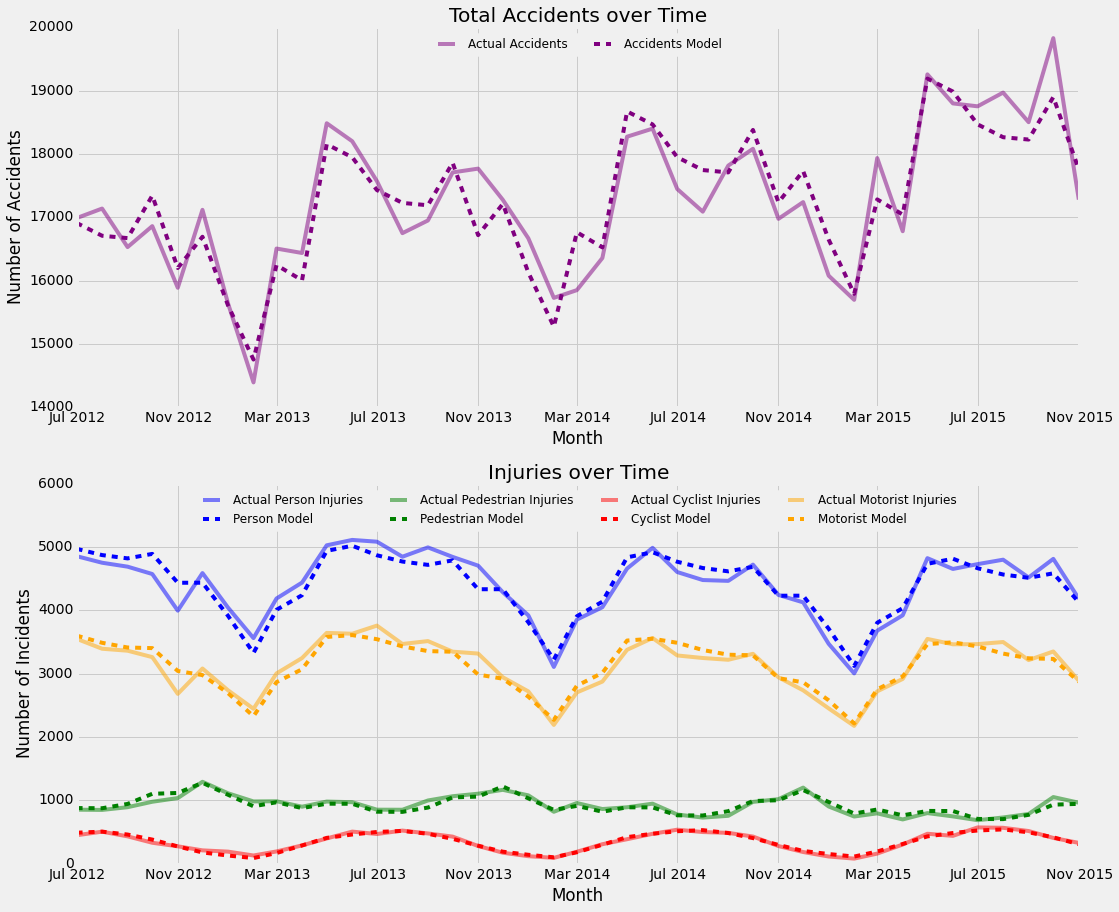

In [154]:
figure, ((ax2),(ax)) = pl.subplots(figsize=(16,14), nrows=2, dpi=600)

# Total Accidents
agg = crashes.groupby('DATE').count()['month']
months = crashes.groupby('DATE').mean()['month']
x = np.unique(crashes['DATE'])

color = 'purple'
ax2.plot_date(x, agg, '-',color=color, alpha=.5, label='Actual Accidents')

df = {'d': range(len(agg)), 'c': agg, 'm': months}
mod = smf.ols(formula='c ~ d + C(m)', data = df).fit()
print mod.summary()
y = mod.predict(df)
ax2.plot_date(x, y, '--',color=color, label='Accidents Model')

ax2.set_title('Total Accidents over Time')
ax2.set_ylabel('Number of Accidents')
ax2.set_xlabel('Month')
ax2.legend(fontsize=12,ncol=4,loc=9)

# Injuries
for col,label,color in injured_categories_2:
    doStuff02(col,label,ax,color)
    
ax.set_title('Injuries over Time')
ax.set_ylabel('Number of Incidents')
ax.set_xlabel('Month')
ax.legend(fontsize=12,ncol=4,loc=9)
#ax.set_ylim([0,8000])

In [119]:
def doStuff0(col):
    print
    print col
    
    agg = crashes.groupby('DATE').sum()[col]
    months = crashes.groupby('DATE').mean()['month']
    
    x = np.unique(crashes['DATE'])
    
    figure, ax = pl.subplots(figsize=(16,6))
    ax.plot_date(x, agg, '-',label='Actual Injuries')
    
    df = {'d': range(len(agg)), 'c': agg, 'm': months}
    mod = smf.ols(formula='c ~ d + C(m)', data = df).fit()
    print mod.summary()
    y = mod.predict(df)
    ax.plot_date(x, y, 'r--',label='Model')
    
    ax.set_title(col)
    ax.set_ylabel('Number of Injuries')
    ax.set_xlabel('Month')
    ax.legend()


NUMBER OF PERSONS INJURED
                            OLS Regression Results                            
Dep. Variable:                      c   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     18.91
Date:                Sat, 05 Dec 2015   Prob (F-statistic):           2.52e-10
Time:                        21:59:16   Log-Likelihood:                -269.18
No. Observations:                  41   AIC:                             564.4
Df Residuals:                      28   BIC:                             586.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     3964.67

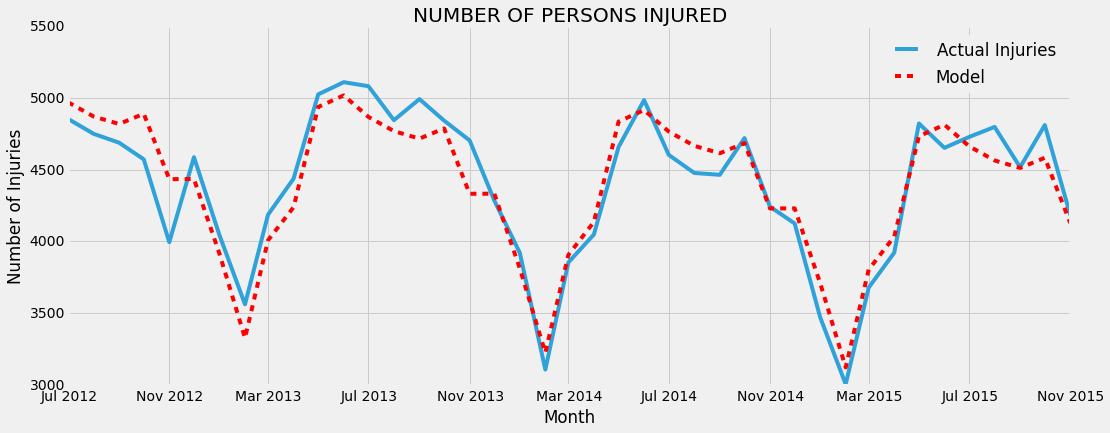

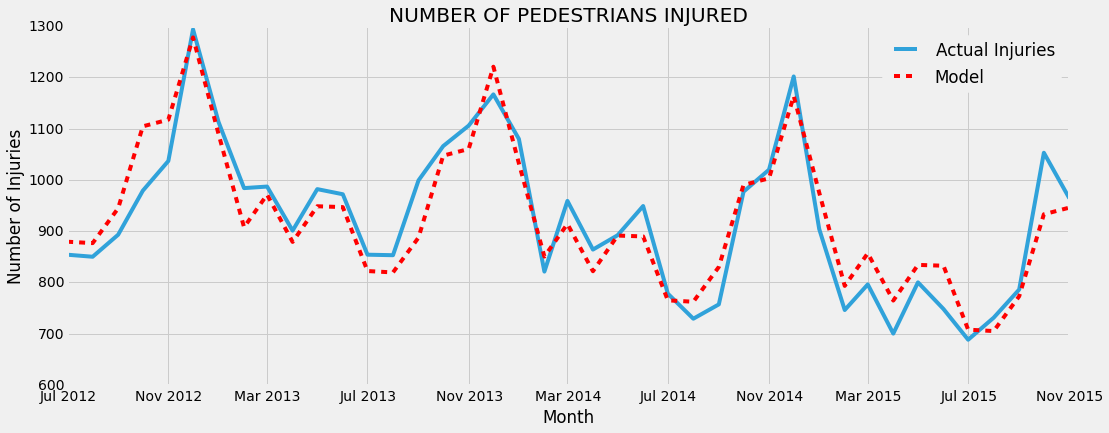

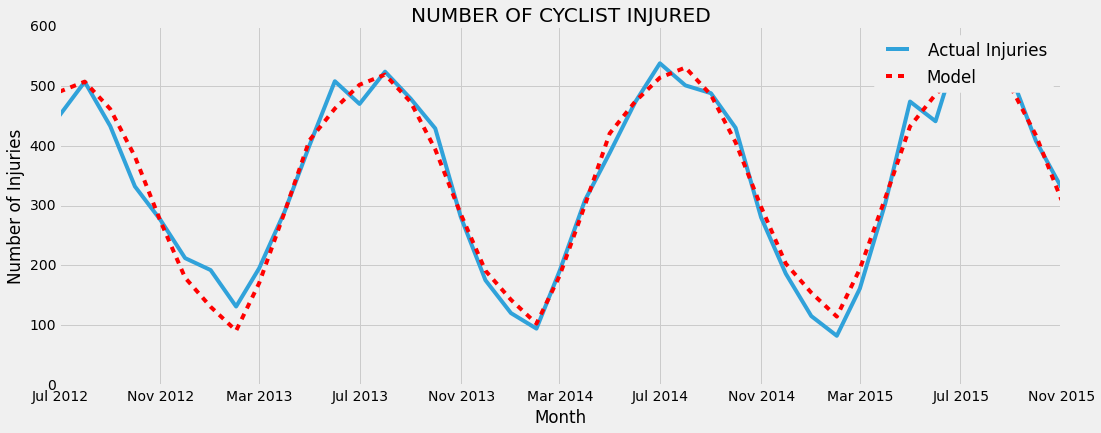

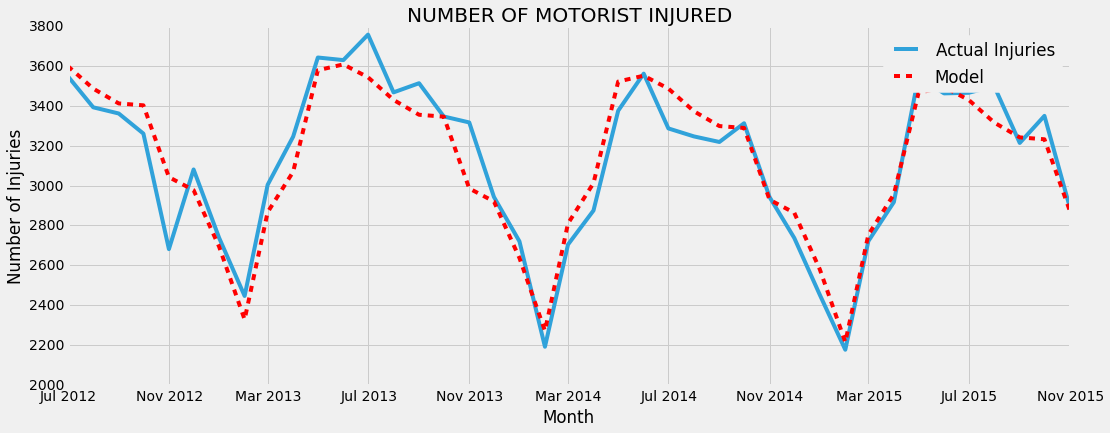

In [120]:
for col in injured_categories:
    doStuff0(col)

In [80]:
agg = crashes.groupby('DATE').sum()['NUMBER OF PEDESTRIANS INJURED']

In [79]:
months = crashes.groupby('DATE').mean()['month']

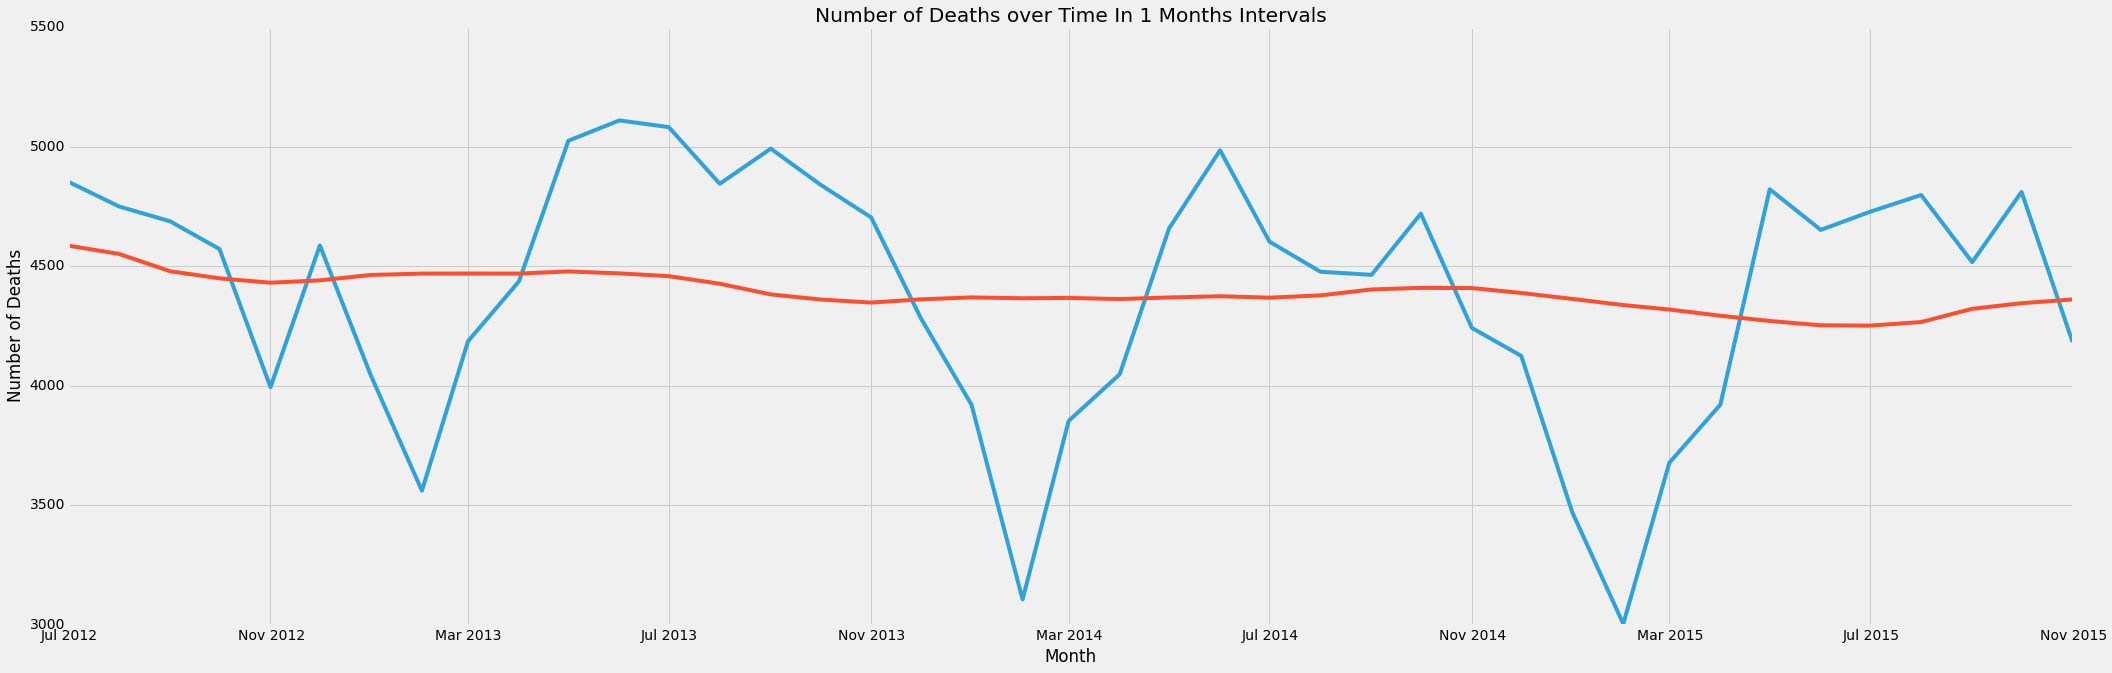

In [36]:
x = np.unique(crashes['DATE'])

figure, ax = pl.subplots(figsize=(32,10))
ax.plot_date(x, agg, '-')
ax.set_title('Number of Deaths over Time In 1 Months Intervals')
ax.set_ylabel('Number of Deaths')
ax.set_xlabel('Month')

#pd.ewma(agg,.5)
smoothed = pd.rolling_mean(agg,12,3,center=True)
ax.plot(x,smoothed)

In [29]:
def doStuff1(col,title,ax,agg=None):    
    # Where Vision Zero Started and Where Speed limit went city wide
    jan_index = 18
    nov_index = 28
    
    # Aggregate
    if agg is None:
        agg = crashes.groupby('DATE').sum()[col]
    months = crashes.groupby('DATE').mean()['month']
    dates = np.unique(crashes['DATE'])
    
    # Control for months
    df = {'c': agg, 'm': months}
    mod = smf.ols(formula='c ~ C(m)', data = df).fit()
    y = mod.predict(df)
    
    # Unaccounted for injuries after running model with months
    diff = agg - y
    
    # Create Fig
    #figure, ax = pl.subplots(figsize=(16,6))
    ax.set_title(title)
    #ax.plot_date(dates,agg,'-',label='Monthly Totals')
    #ax.plot_date(dates,y,'--',color='orange',label='Model with Months')
    ax.plot_date(dates,diff,'-',label='Actual')
    
    
    #Before
    y = diff[:jan_index]#/diff[0]#/np.max(trend[:jan_index+1])
    x = np.arange(len(y))
    df = {'y': y, 'x': x}
    mod = smf.ols(formula='y ~ x', data = df).fit()
    print col, 'BEFORE VZ'
    print mod.summary()
    y = mod.predict(df)
    ax.plot_date(dates[:jan_index],y,'--',color='red',label='Before Jan 2014')
    
    #Before Nov
    y = diff[:nov_index]#/diff[0]#/np.max(trend[:jan_index+1])
    x = np.arange(len(y))
    df = {'y': y, 'x': x}
    mod = smf.ols(formula='y ~ x', data = df).fit()
    print col, 'BEFORE NOV'
    print mod.summary()
    y = mod.predict(df)
    ax.plot_date(dates[:nov_index],y,'--',color='purple',label='Before Nov 2014')
    
    #JAN
    y = diff[jan_index:]#/diff[0]#/np.max(trend[:jan_index+1])
    x = np.arange(len(y))
    df = {'y': y, 'x': x}
    mod = smf.ols(formula='y ~ x', data = df).fit()
    print col, 'JAN'
    print mod.summary()
    y = mod.predict(df)
    ax.plot_date(dates[jan_index:],y,'--',color='orange',label='After Jan 2014')
    
    #NOV
    y = diff[nov_index:]#/diff[0]#/np.max(trend[:jan_index+1])
    x = np.arange(len(y))
    df = {'y': y, 'x': x}
    mod = smf.ols(formula='y ~ x', data = df).fit()
    print col, 'NOV'
    print mod.summary()
    y = mod.predict(df)
    ax.plot_date(dates[nov_index:],y,'--',color='green',label='After Nov 2014')
    
    ax.set_xlabel('Month')
    ax.set_ylabel('Injuries')
    ax.legend(ncol=5)

DATE BEFORE VZ
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     6.709
Date:                Sat, 12 Dec 2015   Prob (F-statistic):             0.0197
Time:                        20:06:02   Log-Likelihood:                -135.79
No. Observations:                  18   AIC:                             275.6
Df Residuals:                      16   BIC:                             277.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -828.9961    219.397     

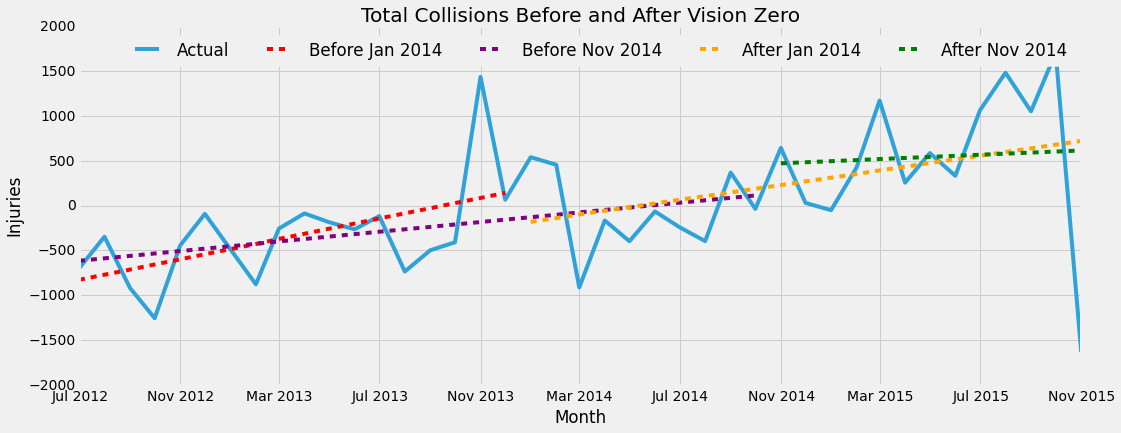

In [30]:
fig, ax = pl.subplots(figsize=(16,6), dpi=600)
agg = crashes.groupby('DATE').count()['month']
doStuff1('DATE','Total Collisions Before and After Vision Zero', ax, agg)

NUMBER OF PERSONS INJURED BEFORE VZ
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     4.033
Date:                Sat, 12 Dec 2015   Prob (F-statistic):             0.0618
Time:                        19:49:11   Log-Likelihood:                -117.06
No. Observations:                  18   AIC:                             238.1
Df Residuals:                      16   BIC:                             239.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     32

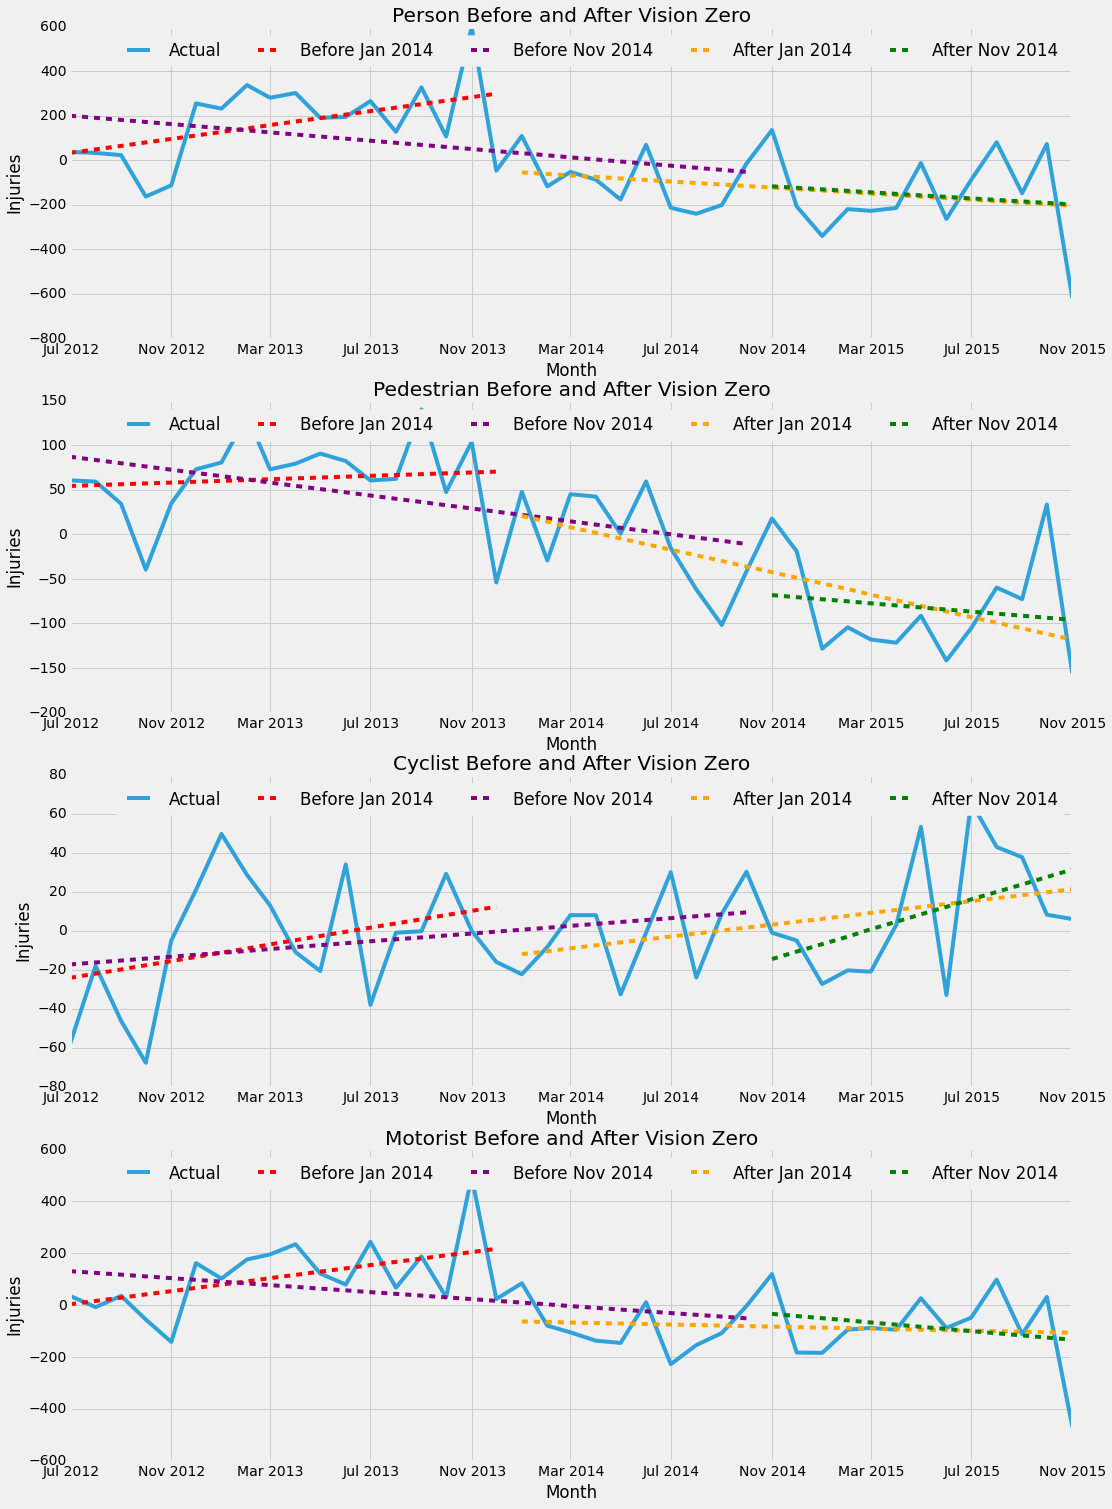

In [25]:
figure, ((ax1),(ax2),(ax3),(ax4)) = pl.subplots(figsize=(16,24), nrows=4, dpi=600)
axes = [ax1, ax2, ax3, ax4]
for col,name,color,i in injured_categories_2:
    doStuff1(col,'%s Injuries Before and After Vision Zero' % name, axes[i])

In [23]:
grouped = crashes.groupby('DATE')
        


# Get numbers for each date
sums = dict([(i,[]) for i in sum_categories])
percents = dict([(i,[]) for i in percent_categories])

date = []
count = []
for d in sorted(grouped.groups.keys())[:-1]:
    print d
    group = grouped.get_group(d)
    
    date.append(group.iloc[0]['DATE'])
    
    
    count.append(group.count()['NUMBER OF PERSONS KILLED'])
    
    group_sum = group.sum()
    for i in sum_categories:
        sums[i].append(group_sum[i])
        
    group_mean = group.mean()
    for i in percent_categories:
        percents[i].append(group_mean[i])

2012-06-30T20:00:00.000000000-0400


Exception KeyboardInterrupt in 'pandas.lib.is_null_datetimelike' ignored


KeyError: 'PERCENT OF PERSONS KILLED'

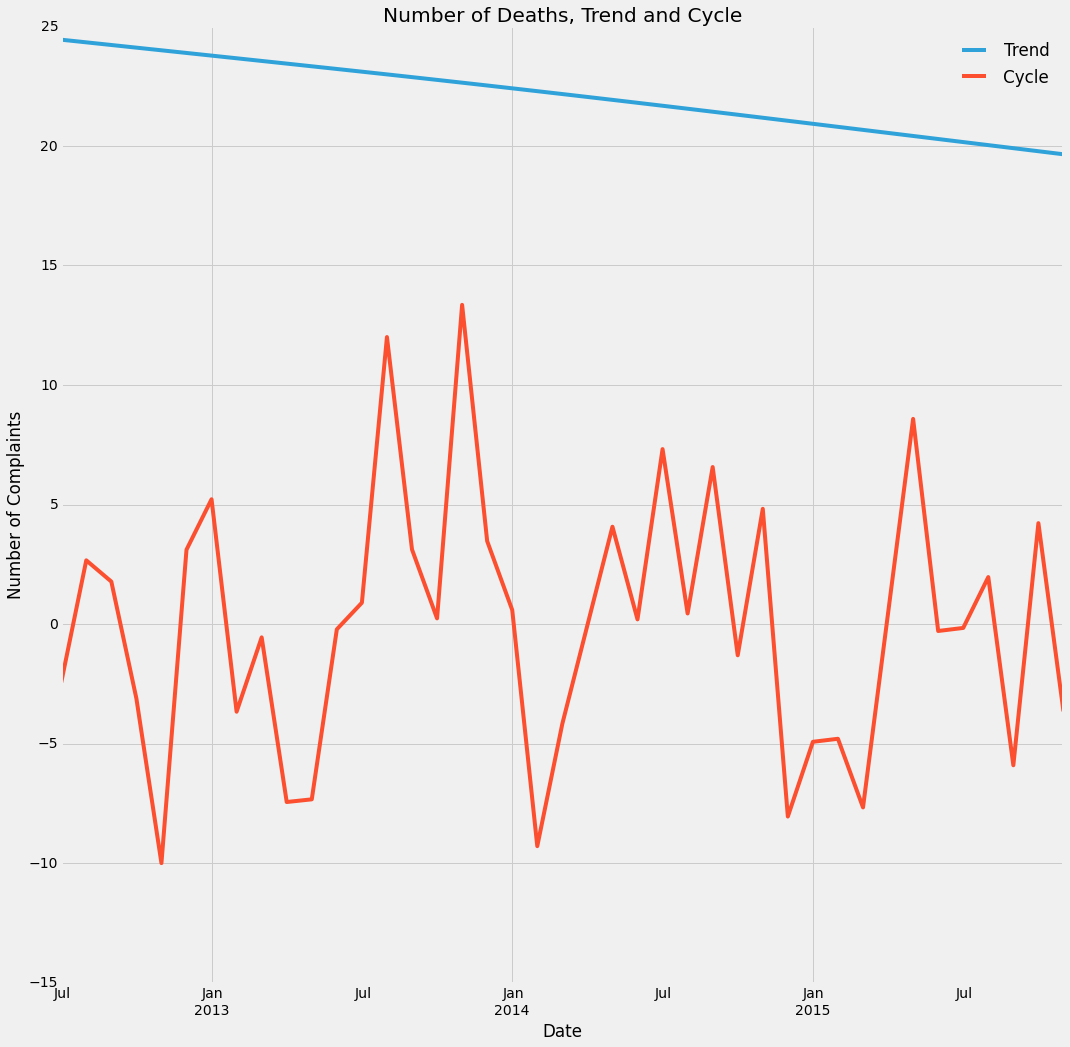

In [32]:
grouped = crashes.groupby('DATE')
cycle, trend = sma.tsa.filters.hpfilter(grouped.sum()['NUMBER OF PERSONS KILLED'], lamb = 129600)
figure, ax = pl.subplots(figsize=(16,16))
trend.plot(label='Trend')
cycle.plot(label='Cycle')
ax.set_title('Number of Deaths, Trend and Cycle')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Complaints')
ax.legend()

In [55]:
# Start of vision zero
jan_index = 17
# Speed limit decrease
nov_index = 28

#scipy.stats.chisquare(np.diff(trend)[:jan_index], np.diff(trend)[jan_index+6:])
#scipy.stats.chisquare(100*np.abs(np.diff(trend))[:jan_index], 100*np.abs(np.diff(trend))[jan_index+6:])

In [102]:
def doStuff(arr, name, lamb=129600):
    jan_index = 17
    # Speed limit decrease
    nov_index = 28
    
    cycle, trend = sma.tsa.filters.hpfilter(arr, lamb = lamb)

    figure, ax = pl.subplots(figsize=(12,8))

    #Before
    y = trend[:jan_index+1]/trend[0]#/np.max(trend[:jan_index+1])
    x = np.arange(len(y))
    ax.plot(x,y,label='Trend Before Vision Zero')

    mod = smf.ols(formula='y ~ x', data = {'x': x, 'y': y}).fit()
    print mod.conf_int()
    y = mod.params[0] + x*mod.params[1]
    ax.plot(x,y,'--', label='Regression of Trend Before Vision Zero')
    #print "Coef:", mod.params[1]

    #Jan
    y = trend[jan_index+1:]/trend[jan_index+1]#/np.max(trend[jan_index+1:])
    x = np.arange(len(y))
    ax.plot(x,y,label='Trend After Vision Zero')

    mod = smf.ols(formula='y ~ x', data = {'x': x, 'y': y}).fit()
    print mod.conf_int()
    y = mod.params[0] + x*mod.params[1]
    ax.plot(x,y,'--',label='Regression of Trend After Vision Zero')
    #print "Coef:", mod.params[1]


    y = trend[nov_index+1:]/trend[nov_index+1]#/np.max(trend[nov_index+1:])
    x = np.arange(len(y))
    ax.plot(x,y,label='Trend After Speed Limit Change')

    mod = smf.ols(formula='y ~ x', data = {'x': x, 'y': y}).fit()
    print mod.conf_int()
    y = mod.params[0] + x*mod.params[1]
    ax.plot(x,y,'--',label='Regression of Trend After Speed Limit Change')
    #print "Coef:", mod.params[1]

    ax.set_title(name)
    ax.legend()

                  0         1
Intercept  1.000035  1.000375
x         -0.004116 -0.004082
                  0         1
Intercept  1.000365  1.000744
x         -0.004931 -0.004900
                  0         1
Intercept  0.999984  0.999997
x         -0.005234 -0.005232
                  0         1
Intercept  0.999929  0.999973
x         -0.001476 -0.001471
                  0         1
Intercept  0.999170  0.999698
x         -0.001346 -0.001303
                  0         1
Intercept  0.999819  0.999968
x         -0.001266 -0.001241
                  0         1
Intercept  1.000218  1.001011
x         -0.006532 -0.006452
                  0         1
Intercept  1.000452  1.000974
x         -0.008139 -0.008096
                  0         1
Intercept  1.000000  1.000020
x         -0.008979 -0.008975
                  0         1
Intercept  1.000124  1.000531
x         -0.005083 -0.005042
                  0         1
Intercept  1.000249  1.000533
x         -0.005961 -0.005938
          

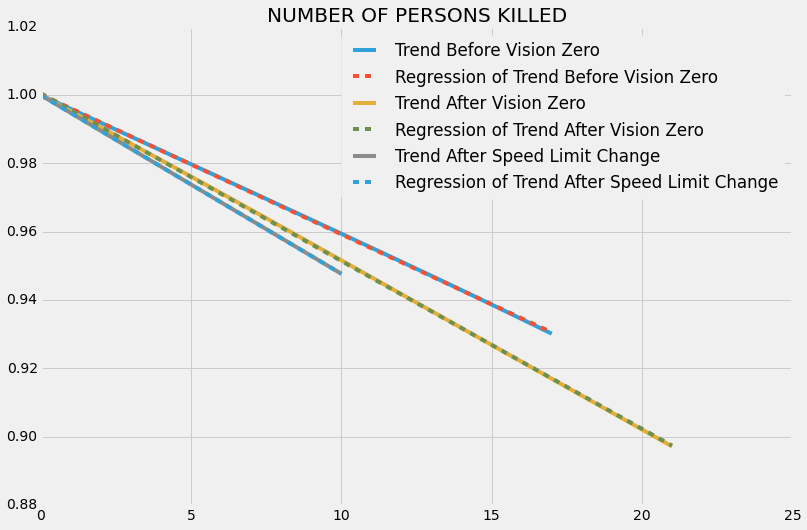

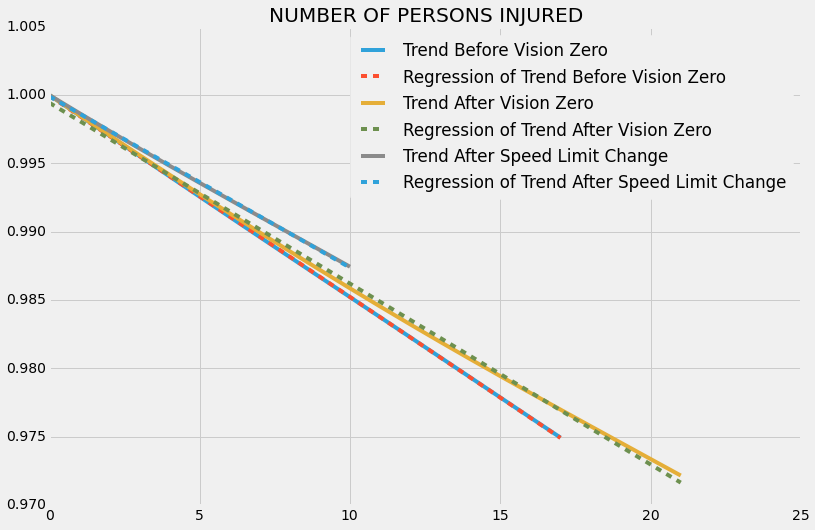

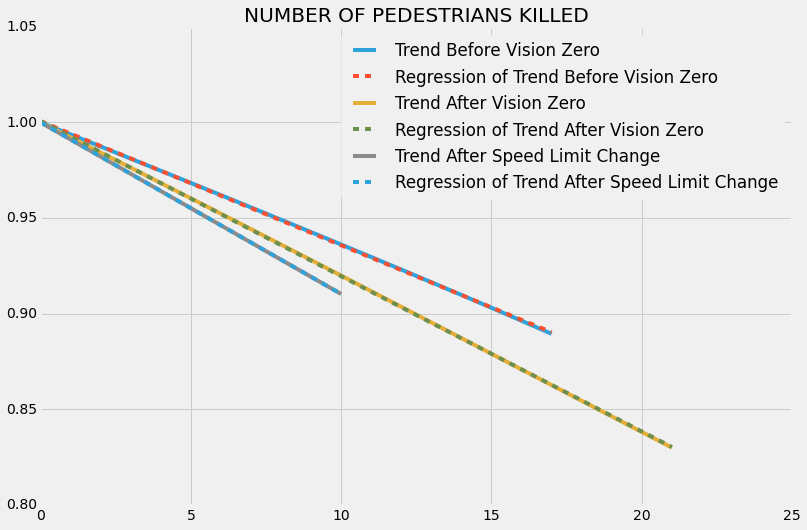

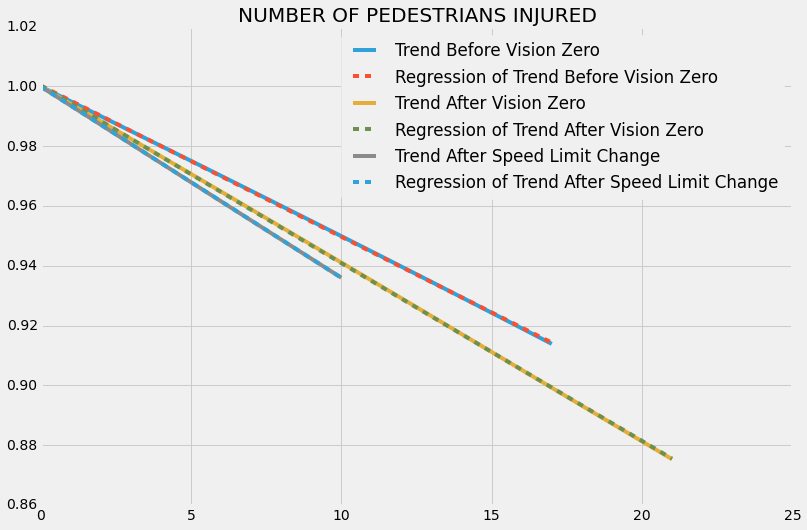

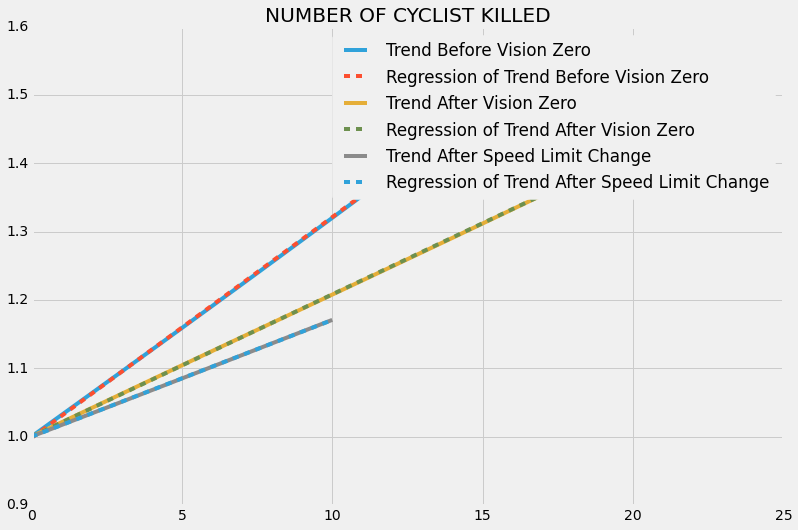

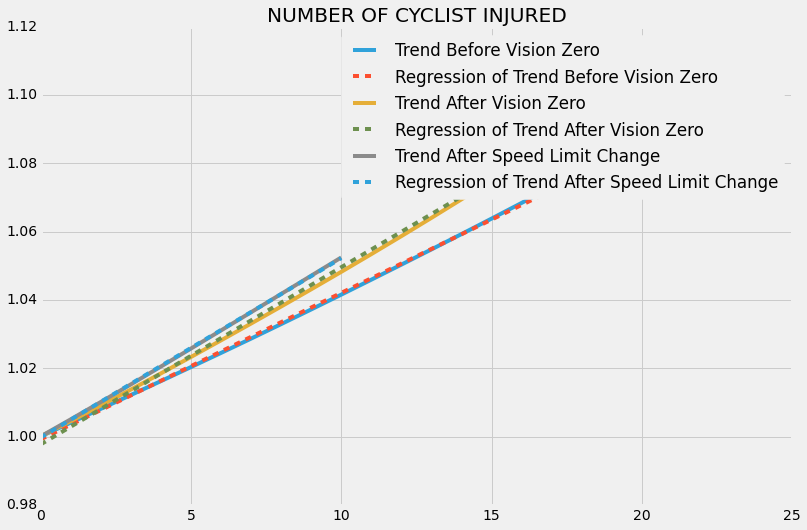

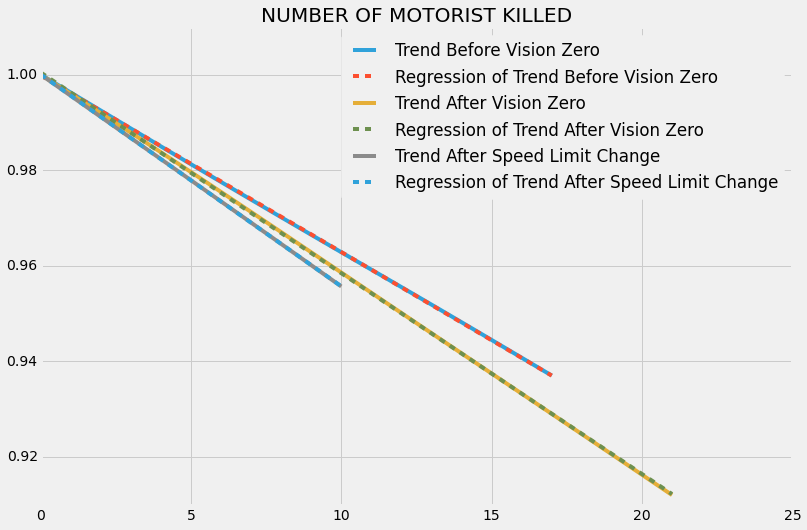

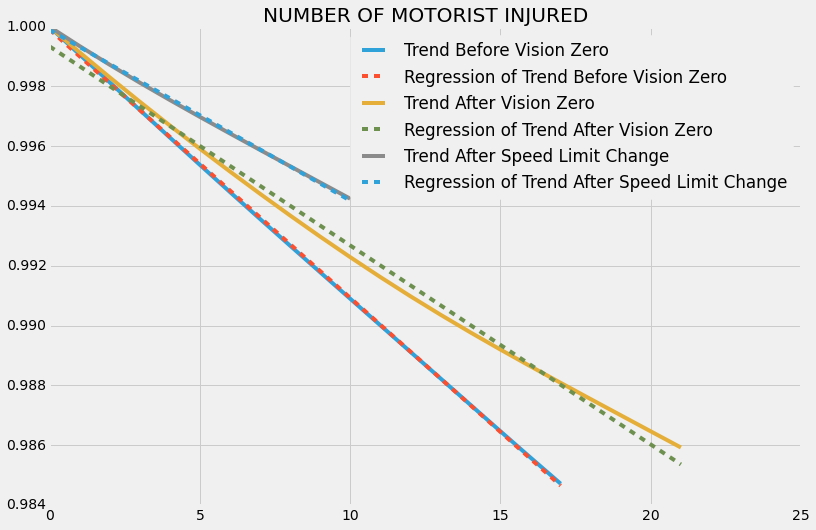

In [176]:
for i in sum_categories:
    doStuff(sums[i], i)

                  0         1
Intercept  1.000103  1.000588
x         -0.002939 -0.002890
                  0         1
Intercept  1.000782  1.001804
x         -0.003893 -0.003810
                  0         1
Intercept  1.000032  1.000173
x         -0.004180 -0.004156
                  0         1
Intercept  1.000110  1.000595
x         -0.001596 -0.001547
                  0         1
Intercept  1.000468  1.001108
x         -0.002210 -0.002158
                  0         1
Intercept  1.000019  1.000127
x         -0.002341 -0.002323
                  0         1
Intercept  0.999620  1.000352
x          0.021926  0.021999
                  0         1
Intercept  1.002562  1.005613
x          0.013483  0.013732
                  0         1
Intercept  1.000052  1.000232
x          0.011411  0.011442
                  0         1
Intercept  1.000004  1.000333
x         -0.004028 -0.003995
                  0         1
Intercept  1.000664  1.001405
x         -0.004999 -0.004939
          

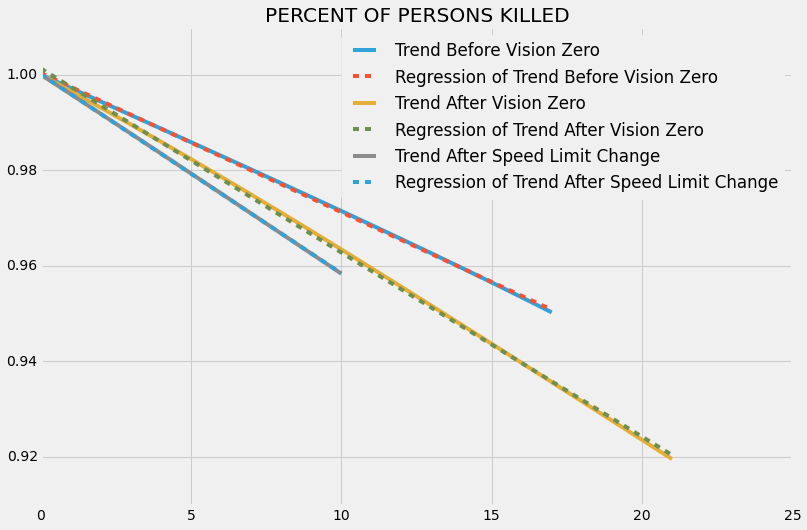

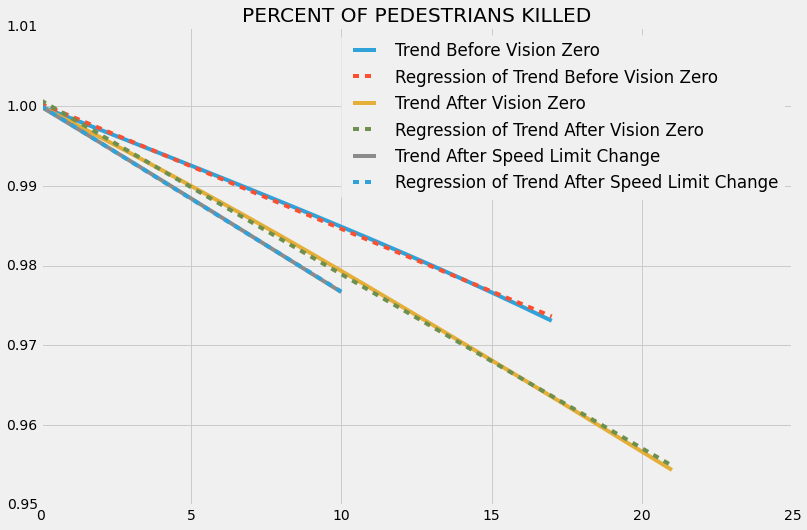

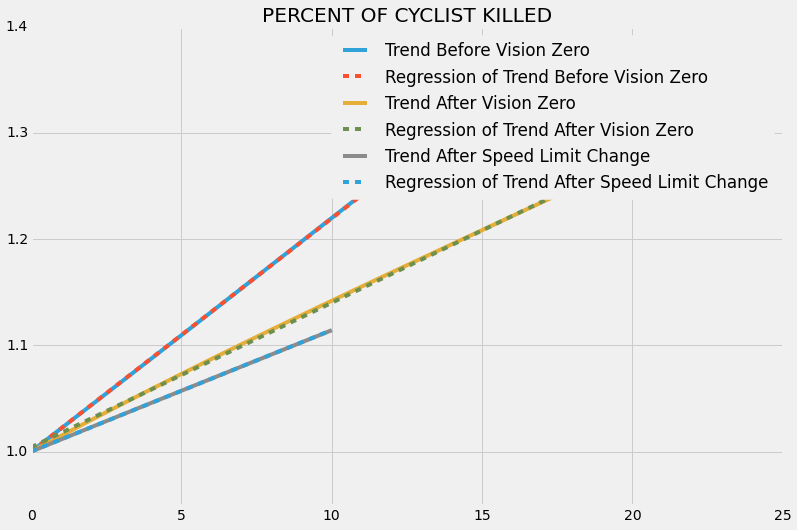

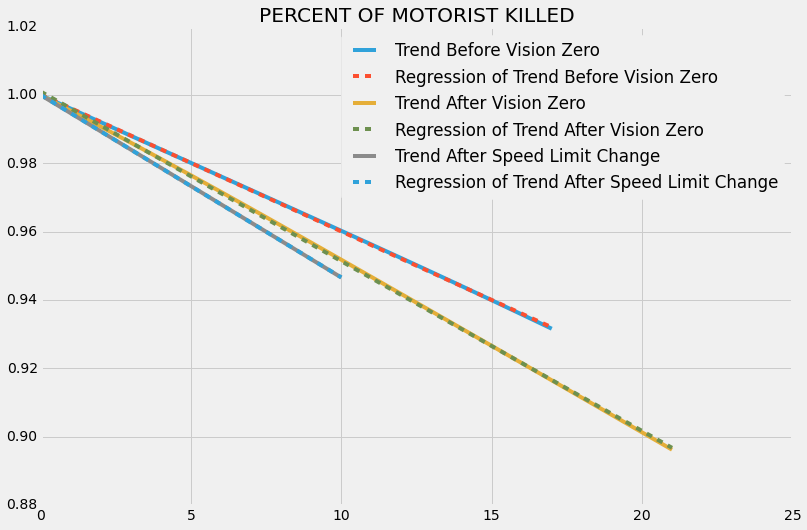

In [177]:
for i in percent_categories:
    doStuff(percents[i], i)

                  0         1
Intercept  0.999878  0.999969
x          0.003007  0.003016
                  0         1
Intercept  0.999425  0.999778
x          0.003012  0.003041
                  0         1
Intercept  0.999904  0.999983
x          0.002980  0.002993


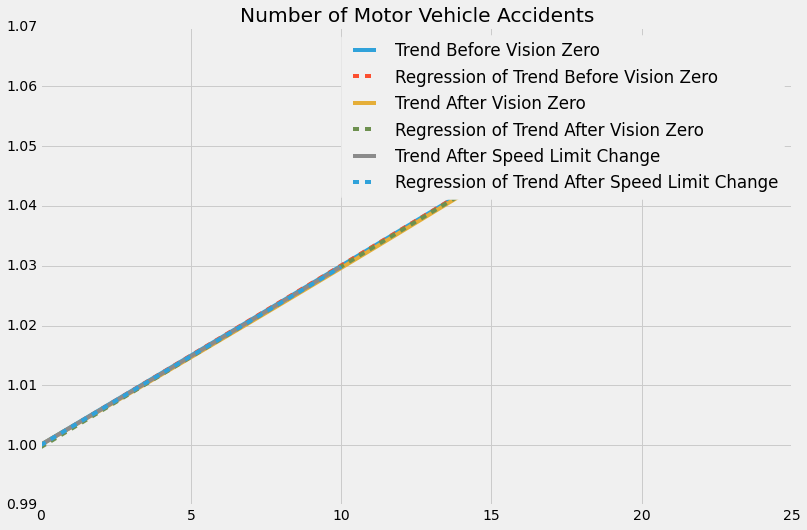

In [178]:
doStuff(count, 'Number of Motor Vehicle Accidents')

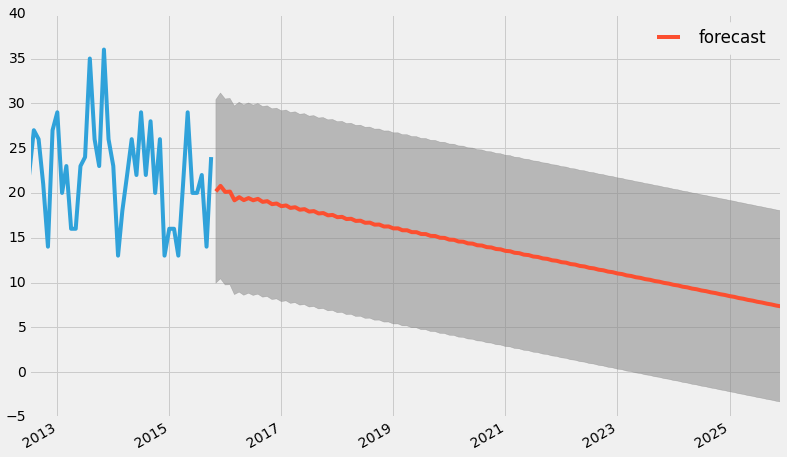

In [194]:
#dates = sorted(grouped.groups.keys())[:-1]
y = sums['NUMBER OF PERSONS KILLED']
mod = statsmodels.tsa.arima_model.ARIMA(np.array(y).astype(float), (6,1,2), dates = date).fit()

figure, ax = pl.subplots(figsize=(12,8))

ax.plot(date, y)
#mod.plot_predict('2015-09-30T20:00:00.000000000-0400', '2025', dynamic=True, ax=ax, plot_insample=False)
mod.plot_predict('2015-11-01', '2025', dynamic=True, ax=ax, plot_insample=False)

ax.set_title('')

In [175]:
sums

{'NUMBER OF CYCLIST INJURED': [450.0,
  507.0,
  433.0,
  332.0,
  276.0,
  212.0,
  192.0,
  131.0,
  195.0,
  290.0,
  400.0,
  508.0,
  470.0,
  524.0,
  479.0,
  429.0,
  281.0,
  175.0,
  120.0,
  94.0,
  190.0,
  309.0,
  388.0,
  473.0,
  538.0,
  501.0,
  488.0,
  430.0,
  280.0,
  186.0,
  115.0,
  82.0,
  161.0,
  304.0,
  474.0,
  441.0,
  574.0,
  568.0,
  517.0,
  408.0],
 'NUMBER OF CYCLIST KILLED': [3.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  2.0,
  3.0,
  0.0,
  1.0,
  0.0,
  2.0,
  2.0,
  0.0,
  1.0,
  1.0,
  0.0,
  2.0,
  2.0,
  3.0,
  3.0,
  4.0,
  1.0,
  1.0,
  2.0,
  0.0,
  1.0,
  0.0,
  0.0,
  2.0,
  1.0,
  1.0,
  3.0,
  3.0,
  2.0,
  2.0],
 'NUMBER OF MOTORIST INJURED': [3550.0,
  3393.0,
  3362.0,
  3261.0,
  2681.0,
  3081.0,
  2738.0,
  2446.0,
  3004.0,
  3246.0,
  3643.0,
  3630.0,
  3758.0,
  3468.0,
  3514.0,
  3347.0,
  3317.0,
  2943.0,
  2720.0,
  2191.0,
  2704.0,
  2875.0,
  3376.0,
  3562.0,
  3287.0,
  3247.0,
  3219.0,
  3